In [39]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt,statsmodels.api as sm
sites = pd.read_table("arabidopsis_birds/eco_data/eco_sites.txt")
counts = pd.read_table("arabidopsis_birds/eco_data/species_counts.txt")

is_mega = counts.columns.str.contains('Megalaima')
sites['has_mega'] = counts.loc[:,is_mega].sum(axis=1) > 0
# imports

to_model = sites.loc[:,['has_mega','Elevation']]
to_model = sm.add_constant(to_model)
to_model.head()
y = to_model['has_mega']
X = to_model.drop(['has_mega'],axis=1)
lr_mod = sm.Logit(y, X).fit()
# builds a logistic model of our data to use for the cutoffs

Write code that uses a variable  called  cutoff . Given any value of cutoff (and the predictions from lr_mod.predict(X) your code should calculate the true positive rate and the false positive rate for that cutoff.

In [87]:
to_model = sites.loc[:,['has_mega','Elevation']]
to_model = sm.add_constant(to_model)
to_model.head()
y = to_model['has_mega']
X = to_model.drop(['has_mega'],axis=1)
lr_mod = sm.Logit(y, X).fit()
# builds a logistic model of our data to use for the cutoffs

net = np.linspace(1,0,1000)
# to test our code we will run lots of cutoffs through it via np.linspace and a for loop.

### IF YOU WANT A SPECIFIC CUTOFF CHANGE NET TO THAT CUTOFF OR SEARCH FOR IT IN DATAFRAME 'df_data' ###

data = {
    'tt_test' : [],
    'ft_test' : [],
    'cutoff' : []
}
# creates a dictionary to store our outputs

sites['cutoff'] = lr_mod.predict(X)
# adds cutoff to our sites df

for cutoff in net:

    ## BELOW IS THE ACTUAL CODE FOR THE HOMEWORK ##

    sites_in_range = sites[sites['cutoff'] >= cutoff]
    # finds the sites that fit within our cutoff

    real_positive_in_range = (sites_in_range['has_mega'] == True).sum()
    real_negative_in_range = (sites_in_range['has_mega'] == False).sum()
    # finds number of real pos and real neg in range by using bool indexing and a sum

    total1s = (sites['has_mega'] == True).sum()
    total0s = (sites['has_mega'] == False).sum()
    # calculates the total sites in range for 1s and 0s

    data['cutoff'].append(cutoff)
    data['tt_test'].append(real_positive_in_range / total1s)
    data['ft_test'].append(real_negative_in_range / total0s)
    # saves true positive test and false positive test and cutoff into our dictionary

    ## END OF HOMEWORK CODE ##

df_data = pd.DataFrame(data)
# converts data into a dataframe

Optimization terminated successfully.
         Current function value: 0.329815
         Iterations 7


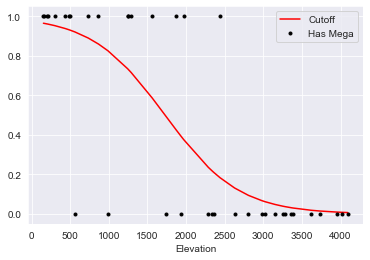

In [88]:
sort_sites = sites.sort_values(by = 'cutoff')
plt.plot(sort_sites['Elevation'], sort_sites['cutoff'], label = "Cutoff", color='red')
plt.plot(sort_sites['Elevation'], sort_sites['has_mega'], '.', label = "Has Mega", color='black')
plt.xlabel('Elevation')
plt.legend()
plt.show()
# visualizes our cutoff and our sites with mega

In [89]:
df_data
# displays the dataframe

,tt_test,ft_test,cutoff
0,0.0,0.0,1.000000
1,0.0,0.0,0.998999
2,0.0,0.0,0.997998
3,0.0,0.0,0.996997
4,0.0,0.0,0.995996
...,...,...,...
995,1.0,1.0,0.004004
996,1.0,1.0,0.003003
997,1.0,1.0,0.002002
998,1.0,1.0,0.001001
